Importing libraries and data

In [9]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [10]:
#Project folder path as a string
path = r'/Users/Nimrat/Documents/World Happiness Report'

In [11]:
#Import the data set into your notebook using the os library
df = pd.read_csv(os.path.join(path, 'Prepared data', 'world_happiness_report_wrangled.csv'))

2. Data cleaning

In [12]:
df.head()

,Unnamed: 0,country_name,year,life_ladder,gdp_per_capita,social_support,life_expectancy_birth,freedom_for_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
0,0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [13]:
#Drop column Unnamed:0 
df = df.drop(columns=['Unnamed: 0'])

In [17]:
#Drop categorical column as we only need numerical variables
df = df.drop(columns=['country_name'])

In [18]:
df.head()

,year,life_ladder,gdp_per_capita,social_support,life_expectancy_birth,freedom_for_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
0,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


3. The elbow technique

In [19]:
#Defining a range of potential numbers of clusters
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [20]:
# Creates a score that represents # a rate of variation for the given cluster option.
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

In [21]:
score

[-174455.3046404884,
 -97725.6277946046,
 -63924.38597161637,
 -49580.03684859821,
 -41462.7995841825,
 -34874.606633021525,
 -31919.45310036318,
 -27866.485593085876,
 -25362.461404211383]

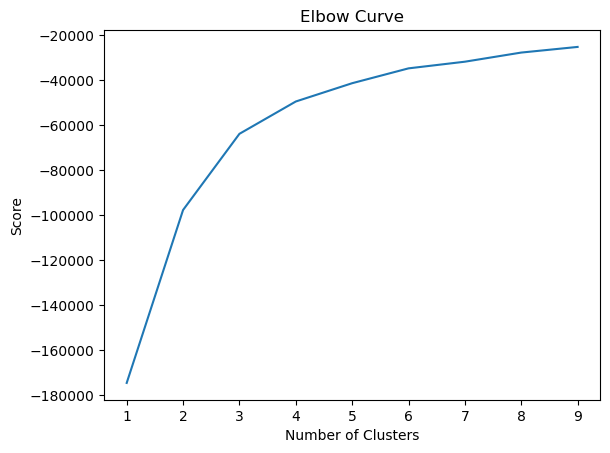

In [22]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There's a very steep drop from k = 1 to 2 then 3. After 3, the curve starts to flatten. This means that the optimal count for clusters is three as it balances model performance with interpretability.

5. k-means algorithm

In [23]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [24]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=3)

In [25]:
#Create a column in the dataframe with values corresponding to which cluster every observation belongs.
df['clusters'] = kmeans.fit_predict(df)

In [26]:
df.head()

,year,life_ladder,gdp_per_capita,social_support,life_expectancy_birth,freedom_for_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,clusters
0,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258,0
1,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237,0
2,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275,0
3,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267,0
4,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268,0


In [27]:
#Check how many observations fall into each cluster via the value_counts function
df['clusters'].value_counts()

clusters
1    924
2    838
0    601
Name: count, dtype: int64

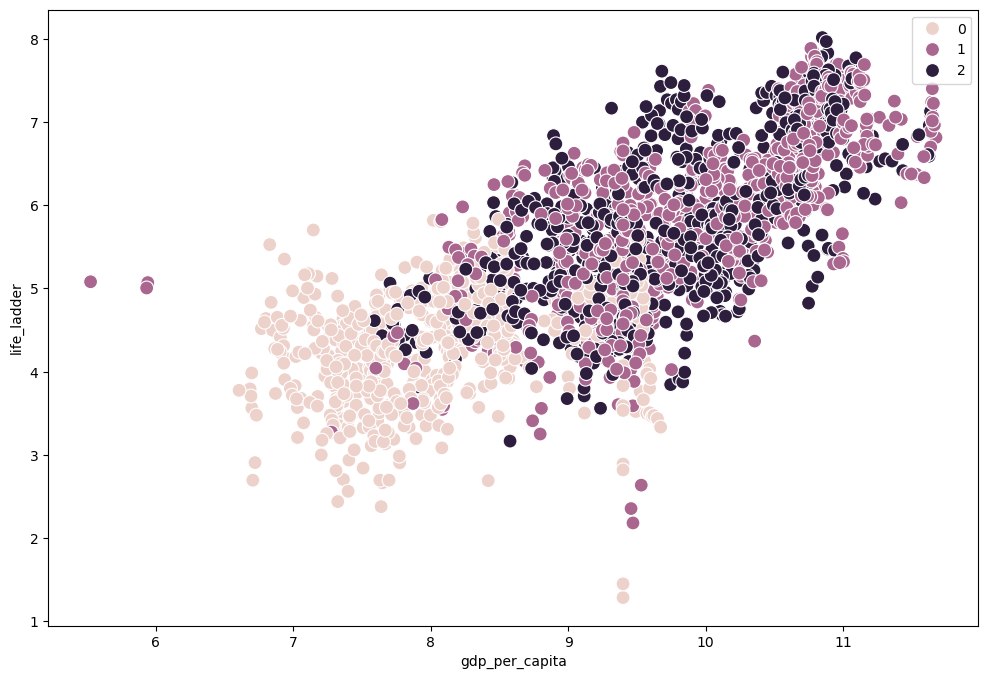

In [30]:
# Plot the clusters for the "gdp_per_capita" and "life_ladder" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['gdp_per_capita'], y=df['life_ladder'], hue=kmeans.labels_, s=100) 

#Export scatterplot before show
plt.savefig(os.path.join(path, 'Analysis', 'scat6_world_happiness_report.png'))

plt.show()

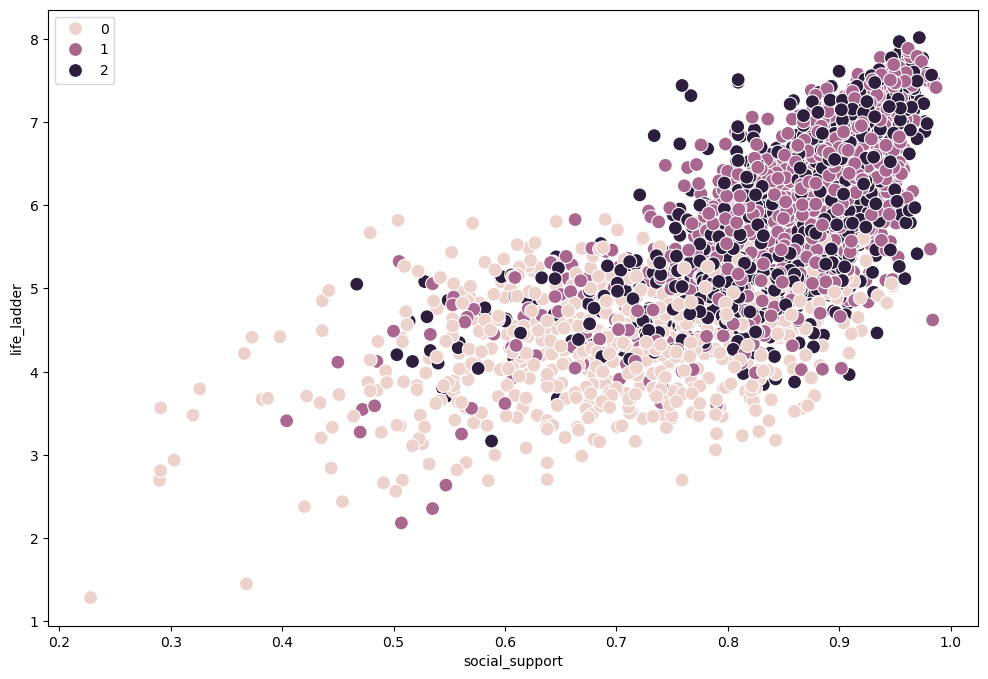

In [31]:
# Plot the clusters for the "social_support" and "life_ladder" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['social_support'], y=df['life_ladder'], hue=kmeans.labels_, s=100) 

#Export scatterplot before show
plt.savefig(os.path.join(path, 'Analysis', 'scat7_world_happiness_report.png'))

plt.show()

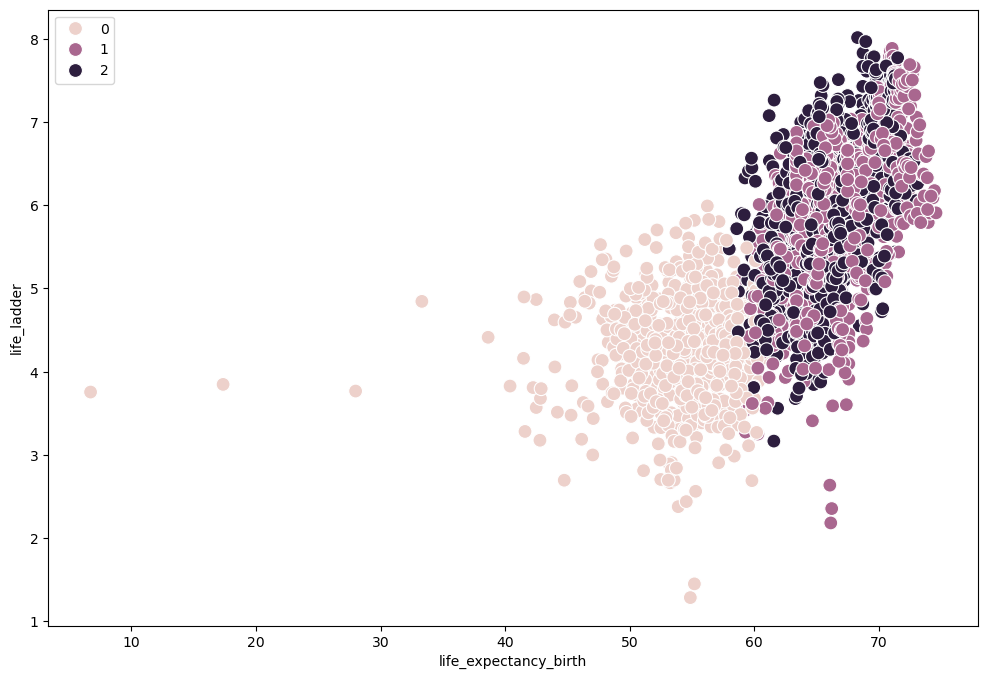

In [32]:
# Plot the clusters for the "life_expectancy_birth" and "life_ladder" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['life_expectancy_birth'], y=df['life_ladder'], hue=kmeans.labels_, s=100) 

#Export scatterplot before show
plt.savefig(os.path.join(path, 'Analysis', 'scat8_world_happiness_report.png'))

plt.show()

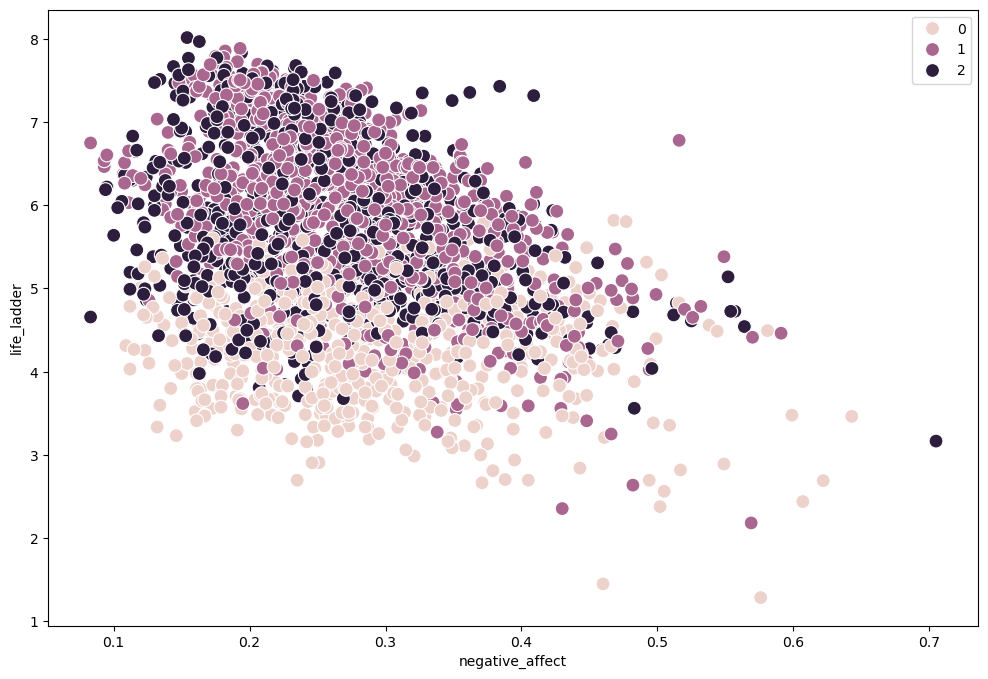

In [33]:
# Plot the clusters for the "negative_affect" and "life_ladder" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['negative_affect'], y=df['life_ladder'], hue=kmeans.labels_, s=100) 

#Export scatterplot before show
plt.savefig(os.path.join(path, 'Analysis', 'scat9_world_happiness_report.png'))

plt.show()

Countries with stronger economic conditions, better health outcomes, and higher social support tend to fall into higher-happiness (life_ladder) clusters. The visualization of negative affect versus happiness adds further insight. Countries with lower negative affect (less frequent experiences of stress, sadness, or anger) generally report higher happiness scores and are more concentrated in higher-happiness clusters. The overlap suggests that negative affect alone does not fully determine happiness, but it still contributes meaningfully to how countries are grouped.

Descriptive statistics for clusters

In [34]:
# Calculate descriptive statistics for each cluster
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [38]:
df.groupby('cluster').agg({
    'life_ladder': ['mean', 'median'],
    'gdp_per_capita': ['mean', 'median'],
    'social_support': ['mean', 'median'],
    'life_expectancy_birth': ['mean', 'median'],
    'negative_affect': ['mean', 'median']
})

life_ladder         gdp_per_capita         social_support         \
                   mean  median           mean  median           mean median   
cluster                                                                        
dark purple    5.810828  5.7475       9.775519   9.805       0.846674  0.864   
pink           4.295298  4.3500       8.022643   7.967       0.693417  0.706   
purple         5.959652  6.0065       9.954469  10.043       0.850956  0.876   

            life_expectancy_birth        negative_affect         
                             mean median            mean median  
cluster                                                          
dark purple             65.838286  65.54        0.258879  0.250  
pink                    53.925973  54.60        0.293940  0.280  
purple                  67.355548  67.10        0.272572  0.265

- Purple cluster represents the highest well being group. It has the It has the highest happiness scores, GDP per capita, social support, and life expectancy, along with relatively low negative affect. Countries in this cluster generally have strong economic conditions, good health outcomes, and supportive social environments.

- Dark purple cluster represents a middle level of well-being. Happiness, income, social support, and life expectancy are moderate compared to the other clusters, and negative affect remains fairly low. Countries in this group show generally stable but mixed well-being conditions.

- Purple cluster represents the lowest well-being group. It has the lowest happiness scores, GDP per capita, social support, and life expectancy, and the highest negative affect. Countries in this cluster tend to face greater economic, health, and emotional challenges.

Propose what these results could be useful for in future steps of an analytics pipeline.
    
These results can be used to group countries with similar happiness and well-being levels, making future analysis easier and more focused. The clusters can help compare countries, track changes over time, and identify which factors may improve well-being in lower-performing groups. They can also be used as inputs for future models or to support policy and planning decisions.